![header](https://storage.googleapis.com/kaggle-competitions/kaggle/27907/logos/header.png?t=2021-05-17-07-20-21)



# Report


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigdata2021-rl-recsys/item_info.csv
/kaggle/input/bigdata2021-rl-recsys/trainset.csv
/kaggle/input/bigdata2021-rl-recsys/track2_testset.csv
/kaggle/input/bigdata2021-rl-recsys/track1_testset.csv
/kaggle/input/processed-trainset/processed_trainset.csv


In [2]:
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/__notebook_source__.ipynb


In [3]:
trainset = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/trainset.csv',' ')

In [4]:
trainset

,user_id,user_click_history,user_protrait,exposed_items,labels,time
0,1,"30:1580603130,34:1581178937,15:1581178939,28:1...","64054,21804,80911,36504,8867,7615,54240,37294,...","1,20,28,99,86,119,213,237,164","1,1,1,1,1,1,1,1,1",1582992009
1,2,"20:1580644762,13:1580644765,1:1580644770,127:1...","64054,26565,93755,88510,6344,7615,54240,21927,...","1,4,26,112,86,117,191,234,172","1,1,1,1,1,1,1,1,0",1582992010
2,3,"39:1580772975,6:1580772981,1:1581178309,2:1581...","64054,64086,63021,88510,93500,7615,54240,21927...","22,4,28,48,105,42,193,236,159","1,1,1,0,1,0,0,0,0",1582992014
3,4,"6:1580657608,9:1580657612,15:1580657615,127:15...","64054,21531,6599,16721,37078,7615,54240,65505,...","5,16,1,74,133,122,235,218,172","1,1,1,1,1,1,1,1,0",1582992014
4,5,"37:1580743545,36:1580743554,25:1580743556,37:1...","64054,66036,6599,88510,76066,20543,83978,37294...","6,1,16,85,73,112,239,172,205","1,1,1,1,1,1,1,1,1",1582992017
...,...,...,...,...,...,...
260082,260083,"18:1590866211,29:1590866361,7:1590866364,7:159...","64054,7723,93755,16721,35011,93364,83978,37294...","29,31,25,127,111,93,171,150,196","0,0,0,0,0,0,0,0,0",1593014108
260083,260084,"34:1590594937,15:1590594939,30:1590594941,133:...","64054,46479,34810,36504,7411,11973,83978,93716...","34,14,9,106,114,86,214,154,172","1,1,1,1,1,1,0,0,1",1593014287
260084,260085,"34:1590594937,15:1590594939,30:1590594941,133:...","64054,46479,34810,36504,7411,11973,83978,93716...","28,35,5,110,125,78,218,200,164","1,1,1,1,1,1,0,1,1",1593014307
260085,260086,"28:1591026017,10:1591026019,25:1591026021,132:...","64054,46485,93755,16721,98428,11973,83978,2192...","30,4,22,105,43,129,172,217,238","1,1,1,1,1,1,1,1,0",1593014325


In [5]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260087 entries, 0 to 260086
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             260087 non-null  int64 
 1   user_click_history  260087 non-null  object
 2   user_protrait       260087 non-null  object
 3   exposed_items       260087 non-null  object
 4   labels              260087 non-null  object
 5   time                260087 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 11.9+ MB


In [6]:
# there are a total of 260087 rows, we randomly choose 10k data for EDA purpose
trainset_10k = trainset.sample(n=10000)

In [7]:
trainset_10k

,user_id,user_click_history,user_protrait,exposed_items,labels,time
62583,62584,0:0,"64054,51167,34810,36504,56754,7615,54240,21927...","34,28,21,129,73,137,235,240,164","1,1,1,0,0,0,0,0,0",1584992112
45122,45123,0:0,"92265,1843,6599,36504,17121,37350,83978,78349,...","33,21,32,125,77,132,164,213,199","1,1,1,1,1,1,0,0,1",1584354581
216809,216810,"34:1589095929,28:1589095935,10:1589095938,86:1...","64054,73517,78388,36504,95905,37350,83978,2192...","27,18,28,51,78,111,200,212,164","1,1,1,1,1,1,1,1,1",1591461015
204309,204310,"1:1588525015,15:1588525018,9:1588525021,127:15...","64054,48783,6599,16721,8867,7615,54240,37294,7...","4,31,35,107,125,51,237,221,172","1,1,1,1,1,0,0,0,0",1590877155
68712,68713,"13:1583080427,1:1583080429,19:1583080431,72:15...","64054,2837,6599,88510,69761,7615,54240,50138,7...","10,3,29,76,131,45,187,194,171","0,0,1,0,0,0,0,0,0",1585419563
...,...,...,...,...,...,...
88616,88617,"1:1583747171,31:1583747173,1:1583747176,1:1584...","64054,78423,6599,16721,87671,70783,83978,21927...","1,2,5,113,77,85,219,171,170","0,1,1,0,0,0,0,0,0",1586049731
6429,6430,"14:1582431400,32:1582431402,25:1582431404,77:1...","64054,12839,6599,36504,56754,7615,54240,21927,...","30,34,5,57,74,43,166,164,172","1,1,1,0,0,0,0,0,0",1583033208
160339,160340,"31:1586654976,8:1586654978,8:1586654980,14:158...","64054,71492,93755,36504,67083,11973,83978,3729...","21,28,2,104,73,131,200,234,164","1,1,1,1,1,1,1,1,1",1589068718
71736,71737,"14:1583031575,7:1583031577,3:1583031579,82:158...","64054,38455,21966,34611,15882,20543,83978,2192...","1,4,28,105,79,115,234,213,170","1,1,1,1,1,1,1,1,0",1585447989


In [8]:
# we first try the easiest: we want to see the distribution of ppl who bought 0, 1, 2, ... 9 items
cnt_dict = {}  # how many ppl bought 0, 1, 2, ... 9 items
for index, row in trainset_10k.iterrows():
    item_ids = row['exposed_items'].split(',')
    is_bought = row['labels'].split(',')
    bought_amount = 0
    for i in range(0, len(is_bought)):
        if is_bought[i] == '1':
            bought_amount += 1
    if bought_amount not in cnt_dict:
        cnt_dict[bought_amount] = 1
    else:
        cnt_dict[bought_amount] += 1

cnt_dict
            

{3: 278,
 7: 1253,
 9: 1526,
 5: 573,
 1: 1011,
 0: 1216,
 8: 2655,
 4: 684,
 2: 610,
 6: 194}

In [9]:
data_display = []
for i in range(0, 10):
    data_display.append(cnt_dict[i])

In [10]:
data_display

[1216, 1011, 610, 278, 684, 573, 194, 1253, 2655, 1526]

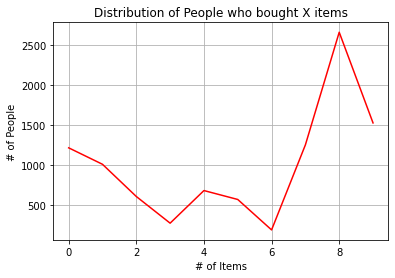

In [11]:
import seaborn as sns
 
from matplotlib import pyplot as plt
import numpy as np
plt.plot(data_display, color = 'r')
plt.title('Distribution of People who bought X items')
plt.xlabel('# of Items')
plt.ylabel('# of People')
plt.grid(True)

plt.show()
# so most people tend to buy 8 items, 2671 ppl out of 10k

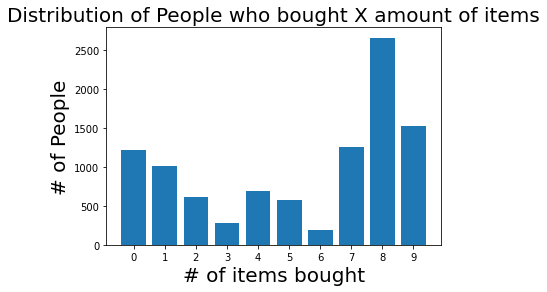

In [12]:
x = np.arange(len(data_display))
plt.bar(x, height=data_display)

plt.xticks(x, [i for i in range(0, 10)])
plt.ylabel('# of People', fontsize=20)
plt.xlabel('# of items bought', fontsize=20)
plt.title('Distribution of People who bought X amount of items', fontsize=20)
plt.show()

# most people bought 8 items

In [13]:
# distribution of user_protrait: choose the top 10 user protraits as classifying features
cnt_dict = {}  
for index, row in trainset_10k.iterrows():
    user_protraits = row['user_protrait'].split(',')
    for user_protrait in user_protraits:
        if user_protrait not in cnt_dict:
            cnt_dict[user_protrait] = 1
        else:
            cnt_dict[user_protrait] += 1
    


In [14]:
user_protrait_cnt_dict = cnt_dict


In [15]:
user_protrait_cnt_list = [(k,v) for k, v in sorted(user_protrait_cnt_dict.items(), key=lambda item: item[1], reverse=True)]

In [16]:
#user_protrait_cnt_list
top_10_features = user_protrait_cnt_list[:10]
top_10_features

[('74820', 9765),
 ('64054', 8851),
 ('83978', 6453),
 ('6599', 5469),
 ('36504', 4380),
 ('7615', 3550),
 ('54240', 3550),
 ('37294', 3139),
 ('21927', 2845),
 ('11973', 1486)]

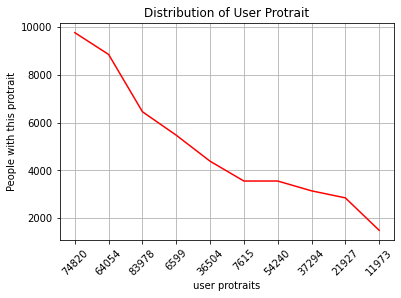

In [17]:
import seaborn as sns
 
from matplotlib import pyplot as plt
import numpy as np

fig,ax = plt.subplots()
ax.set_xticks([i for i in range(0, 10)])
ax.set_xticklabels([x[0] for x in top_10_features])

plt.plot([x[1] for x in top_10_features], color = 'r')
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Distribution of User Protrait')
plt.xlabel('user protraits')
plt.ylabel('People with this protrait')
plt.show()

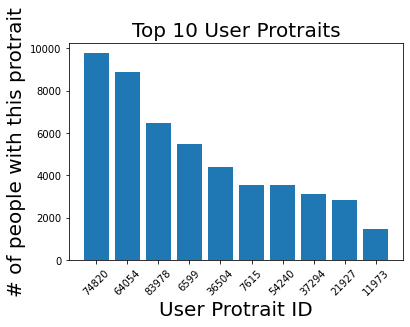

In [18]:
# choose top 10 user protrait for training

import seaborn as sns
 
from matplotlib import pyplot as plt
import numpy as np


x = np.arange(len(top_10_features))
plt.bar(x, height=[x[1] for x in top_10_features])


plt.xticks(x, [x[0] for x in top_10_features], rotation=45)
plt.ylabel('# of people with this protrait', fontsize=20)
plt.xlabel('User Protrait ID', fontsize=20)
plt.title('Top 10 User Protraits', fontsize=20)
plt.show()


In [19]:
trainset_10k

,user_id,user_click_history,user_protrait,exposed_items,labels,time
62583,62584,0:0,"64054,51167,34810,36504,56754,7615,54240,21927...","34,28,21,129,73,137,235,240,164","1,1,1,0,0,0,0,0,0",1584992112
45122,45123,0:0,"92265,1843,6599,36504,17121,37350,83978,78349,...","33,21,32,125,77,132,164,213,199","1,1,1,1,1,1,0,0,1",1584354581
216809,216810,"34:1589095929,28:1589095935,10:1589095938,86:1...","64054,73517,78388,36504,95905,37350,83978,2192...","27,18,28,51,78,111,200,212,164","1,1,1,1,1,1,1,1,1",1591461015
204309,204310,"1:1588525015,15:1588525018,9:1588525021,127:15...","64054,48783,6599,16721,8867,7615,54240,37294,7...","4,31,35,107,125,51,237,221,172","1,1,1,1,1,0,0,0,0",1590877155
68712,68713,"13:1583080427,1:1583080429,19:1583080431,72:15...","64054,2837,6599,88510,69761,7615,54240,50138,7...","10,3,29,76,131,45,187,194,171","0,0,1,0,0,0,0,0,0",1585419563
...,...,...,...,...,...,...
88616,88617,"1:1583747171,31:1583747173,1:1583747176,1:1584...","64054,78423,6599,16721,87671,70783,83978,21927...","1,2,5,113,77,85,219,171,170","0,1,1,0,0,0,0,0,0",1586049731
6429,6430,"14:1582431400,32:1582431402,25:1582431404,77:1...","64054,12839,6599,36504,56754,7615,54240,21927,...","30,34,5,57,74,43,166,164,172","1,1,1,0,0,0,0,0,0",1583033208
160339,160340,"31:1586654976,8:1586654978,8:1586654980,14:158...","64054,71492,93755,36504,67083,11973,83978,3729...","21,28,2,104,73,131,200,234,164","1,1,1,1,1,1,1,1,1",1589068718
71736,71737,"14:1583031575,7:1583031577,3:1583031579,82:158...","64054,38455,21966,34611,15882,20543,83978,2192...","1,4,28,105,79,115,234,213,170","1,1,1,1,1,1,1,1,0",1585447989


In [20]:
trainset_10k

,user_id,user_click_history,user_protrait,exposed_items,labels,time
62583,62584,0:0,"64054,51167,34810,36504,56754,7615,54240,21927...","34,28,21,129,73,137,235,240,164","1,1,1,0,0,0,0,0,0",1584992112
45122,45123,0:0,"92265,1843,6599,36504,17121,37350,83978,78349,...","33,21,32,125,77,132,164,213,199","1,1,1,1,1,1,0,0,1",1584354581
216809,216810,"34:1589095929,28:1589095935,10:1589095938,86:1...","64054,73517,78388,36504,95905,37350,83978,2192...","27,18,28,51,78,111,200,212,164","1,1,1,1,1,1,1,1,1",1591461015
204309,204310,"1:1588525015,15:1588525018,9:1588525021,127:15...","64054,48783,6599,16721,8867,7615,54240,37294,7...","4,31,35,107,125,51,237,221,172","1,1,1,1,1,0,0,0,0",1590877155
68712,68713,"13:1583080427,1:1583080429,19:1583080431,72:15...","64054,2837,6599,88510,69761,7615,54240,50138,7...","10,3,29,76,131,45,187,194,171","0,0,1,0,0,0,0,0,0",1585419563
...,...,...,...,...,...,...
88616,88617,"1:1583747171,31:1583747173,1:1583747176,1:1584...","64054,78423,6599,16721,87671,70783,83978,21927...","1,2,5,113,77,85,219,171,170","0,1,1,0,0,0,0,0,0",1586049731
6429,6430,"14:1582431400,32:1582431402,25:1582431404,77:1...","64054,12839,6599,36504,56754,7615,54240,21927,...","30,34,5,57,74,43,166,164,172","1,1,1,0,0,0,0,0,0",1583033208
160339,160340,"31:1586654976,8:1586654978,8:1586654980,14:158...","64054,71492,93755,36504,67083,11973,83978,3729...","21,28,2,104,73,131,200,234,164","1,1,1,1,1,1,1,1,1",1589068718
71736,71737,"14:1583031575,7:1583031577,3:1583031579,82:158...","64054,38455,21966,34611,15882,20543,83978,2192...","1,4,28,105,79,115,234,213,170","1,1,1,1,1,1,1,1,0",1585447989


In [21]:
columns = ['user_id'] + [x[0] for x in top_10_features] + ['item_' + str(i) for i in range(1, 382)]

In [22]:
# from StringIO import StringIO

processed_trainset = pd.read_csv('/kaggle/input/processed-trainset/processed_trainset.csv', ',')

In [23]:
# processed_trainset = pd.DataFrame([], columns = columns)

In [24]:
# processed_trainset

In [25]:
trainset_10k.iloc[0]['user_protrait']

'64054,51167,34810,36504,56754,7615,54240,21927,74820,75549'

In [26]:
trainset_10k.iloc[2]

user_id                                                          216810
user_click_history    34:1589095929,28:1589095935,10:1589095938,86:1...
user_protrait         64054,73517,78388,36504,95905,37350,83978,2192...
exposed_items                            27,18,28,51,78,111,200,212,164
labels                                                1,1,1,1,1,1,1,1,1
time                                                         1591461015
Name: 216809, dtype: object

In [27]:
# columns = ['user_id'] + [x[0] for x in top_10_features] + ['item_' + str(i) for i in range(1, 382)]
# processed_trainset = pd.DataFrame([], columns = columns)
# cnt = 3
# for index, row in trainset_10k.iterrows():
#     user_protraits = row['user_protrait'].split(',')
#     user_id = str(row['user_id'])
#     to_insert = {}
#     # mark features
#     for column in processed_trainset:
#         if column == 'user_id':
#             to_insert['user_id']=user_id
#         elif not column.startswith('item_'):
#             if column in user_protraits:
#                 to_insert[column]=1
#             else:
#                 to_insert[column]=0
#     # mark items
#     exposed_items = row['exposed_items'].split(',')
#     labels = row['labels'].split(',')

#     for i in range(0, len(exposed_items)):
#         cur_item = 'item_' + exposed_items[i]
# #         print(cur_item)
# #         print(labels[i])
#         to_insert[cur_item] = labels[i]  
    
# #     for i in range(1, 382):
# #         cur_item_id = 'item_' + str(i)
# #         if cur_item_id not in to_insert:
# #             to_insert[cur_item_id] = np.nan
#     # print(to_insert)
#     processed_trainset = processed_trainset.append(to_insert, ignore_index=True)
# #     cnt -= 1
#     if cnt <= 0:
#         break
# processed_trainset.to_csv('processed_trainset.csv', index=False)

In [28]:
processed_trainset.iloc[4]

user_id     183406.0
74820            1.0
64054            1.0
83978            1.0
6599             1.0
              ...   
item_377         NaN
item_378         NaN
item_379         NaN
item_380         NaN
item_381         NaN
Name: 4, Length: 392, dtype: float64

In [29]:
processed_trainset.iloc[1]['item_377']

nan

In [30]:
# processed_trainset.to_csv('processed_trainset.csv', index=False)

In [31]:
trainset_10k

,user_id,user_click_history,user_protrait,exposed_items,labels,time
62583,62584,0:0,"64054,51167,34810,36504,56754,7615,54240,21927...","34,28,21,129,73,137,235,240,164","1,1,1,0,0,0,0,0,0",1584992112
45122,45123,0:0,"92265,1843,6599,36504,17121,37350,83978,78349,...","33,21,32,125,77,132,164,213,199","1,1,1,1,1,1,0,0,1",1584354581
216809,216810,"34:1589095929,28:1589095935,10:1589095938,86:1...","64054,73517,78388,36504,95905,37350,83978,2192...","27,18,28,51,78,111,200,212,164","1,1,1,1,1,1,1,1,1",1591461015
204309,204310,"1:1588525015,15:1588525018,9:1588525021,127:15...","64054,48783,6599,16721,8867,7615,54240,37294,7...","4,31,35,107,125,51,237,221,172","1,1,1,1,1,0,0,0,0",1590877155
68712,68713,"13:1583080427,1:1583080429,19:1583080431,72:15...","64054,2837,6599,88510,69761,7615,54240,50138,7...","10,3,29,76,131,45,187,194,171","0,0,1,0,0,0,0,0,0",1585419563
...,...,...,...,...,...,...
88616,88617,"1:1583747171,31:1583747173,1:1583747176,1:1584...","64054,78423,6599,16721,87671,70783,83978,21927...","1,2,5,113,77,85,219,171,170","0,1,1,0,0,0,0,0,0",1586049731
6429,6430,"14:1582431400,32:1582431402,25:1582431404,77:1...","64054,12839,6599,36504,56754,7615,54240,21927,...","30,34,5,57,74,43,166,164,172","1,1,1,0,0,0,0,0,0",1583033208
160339,160340,"31:1586654976,8:1586654978,8:1586654980,14:158...","64054,71492,93755,36504,67083,11973,83978,3729...","21,28,2,104,73,131,200,234,164","1,1,1,1,1,1,1,1,1",1589068718
71736,71737,"14:1583031575,7:1583031577,3:1583031579,82:158...","64054,38455,21966,34611,15882,20543,83978,2192...","1,4,28,105,79,115,234,213,170","1,1,1,1,1,1,1,1,0",1585447989


In [32]:
processed_trainset

,user_id,74820,64054,83978,6599,36504,7615,54240,37294,21927,...,item_372,item_373,item_374,item_375,item_376,item_377,item_378,item_379,item_380,item_381
0,216475,1,1,1,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122197,1,1,0,1,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,127293,1,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,232290,1,1,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183406,1,1,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,191561,1,1,0,1,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,89187,1,1,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,123113,1,1,0,1,0,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,163955,1,1,0,0,0,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
processed_trainset.iloc[1]

user_id     122197.0
74820            1.0
64054            1.0
83978            0.0
6599             1.0
              ...   
item_377         NaN
item_378         NaN
item_379         NaN
item_380         NaN
item_381         NaN
Name: 1, Length: 392, dtype: float64

In [34]:
trainset[trainset['user_id']==122197]['user_protrait']

122196    64054,11400,6599,73143,53044,7615,54240,93716,...
Name: user_protrait, dtype: object

In [35]:
trainset[trainset['user_id']==122197]

,user_id,user_click_history,user_protrait,exposed_items,labels,time
122196,122197,"15:1585450816,28:1585450818,19:1585450820,99:1...","64054,11400,6599,73143,53044,7615,54240,93716,...","2,1,21,100,76,130,235,240,170","1,1,1,1,1,1,1,1,0",1587830789


In [36]:
processed_trainset.iloc[1]['item_171']

nan

In [37]:
from sklearn.ensemble import RandomForestClassifier

cur_item = 'item_1'

cur_Xy = processed_trainset[~processed_trainset[cur_item].isnull()]
train_test_perc = 0.8
cur_len = len(cur_Xy)

cur_Xy_train = cur_Xy.head(int(cur_len * train_test_perc))
cur_Xy_test = cur_Xy.tail(cur_len - int(cur_len * train_test_perc))


# selected_rows = df[~df['Age'].isnull()]

In [38]:
print(cur_len)
print(len(cur_Xy_train))
print(len(cur_Xy_test))

1703
1362
341


In [39]:
cur_Xy_train

,user_id,74820,64054,83978,6599,36504,7615,54240,37294,21927,...,item_372,item_373,item_374,item_375,item_376,item_377,item_378,item_379,item_380,item_381
1,122197,1,1,0,1,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,170986,1,1,1,1,1,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,205822,1,1,0,1,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,112559,1,0,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,19298,0,0,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,147507,1,1,1,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8105,91482,1,1,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8106,7378,1,1,1,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8123,59809,1,1,1,1,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
top_10_feature_ids = [x[0] for x in top_10_features]

In [41]:
X_train = cur_Xy_train[[x[0] for x in top_10_features]]
y_train = cur_Xy_train[cur_item]

X_test = cur_Xy_test[[x[0] for x in top_10_features]]
y_test = cur_Xy_test[cur_item]

In [42]:
X_train

,74820,64054,83978,6599,36504,7615,54240,37294,21927,11973
1,1,1,0,1,0,1,1,0,0,0
16,1,1,1,1,1,0,0,1,0,0
18,1,1,0,1,0,1,1,0,0,0
20,1,0,1,1,0,0,0,0,0,0
26,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8100,1,1,1,1,1,0,0,0,1,0
8105,1,1,1,0,0,0,0,0,0,0
8106,1,1,1,1,0,0,0,0,1,1
8123,1,1,1,1,0,0,0,1,0,0


In [43]:
y_train

1       1.0
16      0.0
18      1.0
20      0.0
26      1.0
       ... 
8100    1.0
8105    0.0
8106    1.0
8123    1.0
8132    1.0
Name: item_1, Length: 1362, dtype: float64

In [44]:
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [45]:
# prediction accuracy == 84%
(predictions==y_test).sum() / len(y_test)

0.8387096774193549

In [46]:
from sklearn.ensemble import RandomForestClassifier

all_rf = {}
accuracy_dict = {}
cnt = 10
for i in range(1, 382):
    cur_item = 'item_' + str(i)
    cur_Xy = processed_trainset[~processed_trainset[cur_item].isnull()]
    if len(cur_Xy) == 0:
        print('Item {} never showed up.'.format(i))
        continue
    if len(cur_Xy) < 10:
        print('Item {} showed up less than 10 times.'.format(i))
        continue    
    train_test_perc = 0.8
    cur_len = len(cur_Xy)

    cur_Xy_train = cur_Xy.head(int(cur_len * train_test_perc))
    cur_Xy_test = cur_Xy.tail(cur_len - int(cur_len * train_test_perc))    
    X_train = cur_Xy_train[[x[0] for x in top_10_features]]
    y_train = cur_Xy_train[cur_item]

    X_test = cur_Xy_test[[x[0] for x in top_10_features]]
    y_test = cur_Xy_test[cur_item]
    
    model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)    
    
    accuracy = (predictions==y_test).sum() / len(y_test)
    accuracy_dict[i] = accuracy
    print('Item {} has accuracy {}'.format(i, accuracy))
    
    X = cur_Xy[[x[0] for x in top_10_features]]
    y = cur_Xy[cur_item]
    model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
    model.fit(X, y)
    
    all_rf[i] = model
        
#     cnt -= 1
    if cnt <=0:
        break
 

Item 1 has accuracy 0.8387096774193549
Item 2 has accuracy 0.7018348623853211
Item 3 has accuracy 0.7181208053691275
Item 4 has accuracy 0.8113207547169812
Item 5 has accuracy 0.7665369649805448
Item 6 has accuracy 0.7534246575342466
Item 7 has accuracy 0.7152317880794702
Item 8 has accuracy 0.6972477064220184
Item 9 has accuracy 0.719626168224299
Item 10 has accuracy 0.7214285714285714
Item 11 has accuracy 0.8172043010752689
Item 12 has accuracy 0.7297297297297297
Item 13 has accuracy 0.6538461538461539
Item 14 has accuracy 0.8912386706948641
Item 15 has accuracy 0.8631578947368421
Item 16 has accuracy 0.7572815533980582
Item 17 has accuracy 0.7572815533980582
Item 18 has accuracy 0.7972027972027972
Item 19 has accuracy 0.8403361344537815
Item 20 has accuracy 0.7570093457943925
Item 21 has accuracy 0.6283783783783784
Item 22 has accuracy 0.7222222222222222
Item 23 has accuracy 0.746031746031746
Item 24 has accuracy 0.6434782608695652
Item 25 has accuracy 0.6842105263157895
Item 26 has

In [47]:
len(accuracy_dict.keys())

246

In [48]:
accuracy_dict

{1: 0.8387096774193549,
 2: 0.7018348623853211,
 3: 0.7181208053691275,
 4: 0.8113207547169812,
 5: 0.7665369649805448,
 6: 0.7534246575342466,
 7: 0.7152317880794702,
 8: 0.6972477064220184,
 9: 0.719626168224299,
 10: 0.7214285714285714,
 11: 0.8172043010752689,
 12: 0.7297297297297297,
 13: 0.6538461538461539,
 14: 0.8912386706948641,
 15: 0.8631578947368421,
 16: 0.7572815533980582,
 17: 0.7572815533980582,
 18: 0.7972027972027972,
 19: 0.8403361344537815,
 20: 0.7570093457943925,
 21: 0.6283783783783784,
 22: 0.7222222222222222,
 23: 0.746031746031746,
 24: 0.6434782608695652,
 25: 0.6842105263157895,
 26: 0.7209302325581395,
 27: 0.7291666666666666,
 28: 0.8992248062015504,
 29: 0.8556701030927835,
 30: 0.7048192771084337,
 31: 0.8627450980392157,
 32: 0.8059701492537313,
 33: 0.8212290502793296,
 34: 0.8394160583941606,
 35: 0.7536231884057971,
 36: 0.5952380952380952,
 37: 0.6463414634146342,
 38: 0.6982758620689655,
 39: 0.7785714285714286,
 40: 0.6481481481481481,
 41: 0.5714

In [49]:
all_rf

{1: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 2: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 3: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 4: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 5: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 6: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 7: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 8: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 9: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 10: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 11: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 12: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 13: RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
 14: RandomForestClas

In [50]:
testset = pd.read_csv('/kaggle/input/bigdata2021-rl-recsys/track1_testset.csv',' ')
testset

,user_id,user_click_history,user_protrait,exposed_items,labels,time
0,1,"24:1580573710,7:1580573724,1:1580573730,127:15...","64054,50887,66367,44932,59460,20543,83978,5013...","3,5,29,72,53,52,164,211,172","0,0,0,0,0,0,0,0,0",1582992008
1,2,"35:1580629376,9:1580629379,2:1580629381,73:158...","64054,35323,6599,36504,24180,37350,83978,21927...","22,29,25,132,73,108,188,213,164","0,0,0,0,0,0,0,0,0",1582992009
2,3,"35:1580804903,32:1580804915,39:1581268224,33:1...","64054,67884,6599,16721,17121,38762,83978,37294...","29,35,14,61,51,106,150,148,234","0,0,0,0,0,0,0,0,0",1582992019
3,4,"15:1580688381,5:1580688385,39:1580688388,39:15...","64054,23083,93755,36504,35011,37350,83978,3729...","29,27,35,99,79,107,213,200,152","0,0,0,0,0,0,0,0,0",1582992024
4,5,"29:1580906648,18:1580906650,10:1580906652,139:...","64054,32125,93755,36504,37741,7615,54240,21927...","4,8,28,102,61,86,151,235,199","0,0,0,0,0,0,0,0,0",1582992027
...,...,...,...,...,...,...
206249,206250,0:0,"92265,96861,6599,36504,76066,11973,83978,16279...","28,32,25,77,126,127,164,233,200","0,0,0,0,0,0,0,0,0",1593014193
206250,206251,"8:1590906369,24:1590906371,37:1590906373,82:15...","64054,87540,6599,73143,24180,11973,83978,37294...","39,10,32,130,113,48,158,168,153","0,0,0,0,0,0,0,0,0",1593014200
206251,206252,0:0,"64054,5205,6599,36504,65289,7615,54240,37294,7...","6,16,4,80,99,51,200,150,234","0,0,0,0,0,0,0,0,0",1593014247
206252,206253,"28:1590480010,31:1590480012,10:1590480014,80:1...","64054,33685,6599,36504,56754,7615,54240,37294,...","15,24,7,58,139,53,190,164,220","0,0,0,0,0,0,0,0,0",1593014372


In [56]:
import time

test_result = pd.DataFrame([], columns = ['id', 'category'])

start_time = int(time.time())
cnt = 1
for index, row in testset.iterrows():
#     print(row)
    item_ids = row['exposed_items'].split(',')
    user_protraits = row['user_protrait'].split(',')
#     user_protraits = row['user_protrait'].split(',')    
    cur_X = pd.DataFrame([], columns = top_10_feature_ids)

    to_insert = {}
    for column in cur_X:
        if column in user_protraits:
            to_insert[column]=1
        else:
            to_insert[column]=0
#     print('to_insert')
#     print(to_insert)
    cur_X = cur_X.append(to_insert, ignore_index=True)
#     print('cur_X')        
#     print(cur_X)
    predictions = []
    for item_id in item_ids:
        item_id = int(item_id)
        if item_id in all_rf:
            cur_pred = all_rf[item_id].predict(cur_X)
#             print('Pred item {} is {}'.format(item_id, cur_pred))
            if cur_pred > 0.5:
                cur_pred = 1
            else:
                cur_pred = 0
        else:
            # buy is more than not-buy
            cur_pred = 1
        predictions.append(cur_pred)
#     print('predictions')
#     print(predictions)

#     test_result_to_insert['id'] = row['user_id']
    predictions = [str(p) for p in predictions]
#     test_result_to_insert['category'] = ' '.join(predictions)   
    
    test_result_to_insert = {'id': row['user_id'], 'category': ' '.join(predictions)}   
    test_result = test_result.append(test_result_to_insert, ignore_index=True)
    cnt += 1
    if cnt % 5000 == 0:
        cur_time = int(time.time())
        used_time_in_secs = cur_time - start_time
        test_result.to_csv('top_' + str(cnt) + '.csv', index=False)
        print('{} done, used {} secs'.format(cnt, used_time_in_secs))


print('finally all done')
test_result.to_csv('submission.csv', index=False)


5000 done, used 158 secs
10000 done, used 319 secs
15000 done, used 481 secs
20000 done, used 647 secs
25000 done, used 814 secs
30000 done, used 984 secs
35000 done, used 1155 secs
40000 done, used 1328 secs
45000 done, used 1503 secs
50000 done, used 1681 secs
55000 done, used 1860 secs
60000 done, used 2043 secs
65000 done, used 2233 secs
70000 done, used 2426 secs
75000 done, used 2624 secs
80000 done, used 2823 secs
85000 done, used 3027 secs
90000 done, used 3234 secs
95000 done, used 3446 secs
100000 done, used 3664 secs
105000 done, used 3883 secs
110000 done, used 4103 secs
115000 done, used 4329 secs
120000 done, used 4552 secs
125000 done, used 4781 secs
130000 done, used 5014 secs
135000 done, used 5249 secs
140000 done, used 5488 secs
145000 done, used 5733 secs
150000 done, used 5981 secs
155000 done, used 6233 secs
160000 done, used 6489 secs
165000 done, used 6749 secs
170000 done, used 7011 secs
175000 done, used 7276 secs
180000 done, used 7549 secs
185000 done, used 

In [ ]:
test_result